**Introduction to Haar Cascade Classifier**

Let us try to understand Haar Sequence. In 1909, Alfred Haar proposed Haar Sequence. A wavelet is a wave like oscillation. It starts from zero,increases, and then decreases back to zero. You can consider wavelet as an integration of sine wave with various frequencies. Haar Wavelet is a sequence of rescaled "square shape" functions. Such functions are discontinuous and non-differentiable in nature.



This tutorial shows the use of Google Colab for creating face detection system. It has two parts - 1. How to read and display image from a location? 2. How to run webcam of your PC by using Google Colab? In this tutorial, we have used Haar Cascade Classifier. It is based on Haar Wavelet Technique. You can refer https://medium.com/@krsatyam1996/haar-cascade-face-identification-aa4b8bc79478



In [ ]:
!pip install opencv-python


Resized Image:  (600, 550, 3)


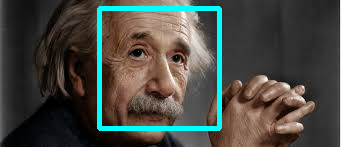

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/sample_data/einstein.jpg",1)
face_cascade = cv2.CascadeClassifier("/content/sample_data/haarcascade_frontalface_default.xml")
resize_img = cv2.resize(img,(550,600))
print("Resized Image: ", resize_img.shape)
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ei_face = face_cascade.detectMultiScale(gray_img,scaleFactor=1.05,minNeighbors=5)
for x,y,w,h in ei_face:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),3)
cv2_imshow(img)  


2. How to run webcam of your PC by usign Google Colab?

In Google Colab you are writing and running your code on cloud. You are trying to use your laptop/desktop cam. Therefore a script is required to do the work. Script will run your cam and allow you to save any image. This is also real time image processing but little bit different from traditional use of opencv on person laptop/desktop.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


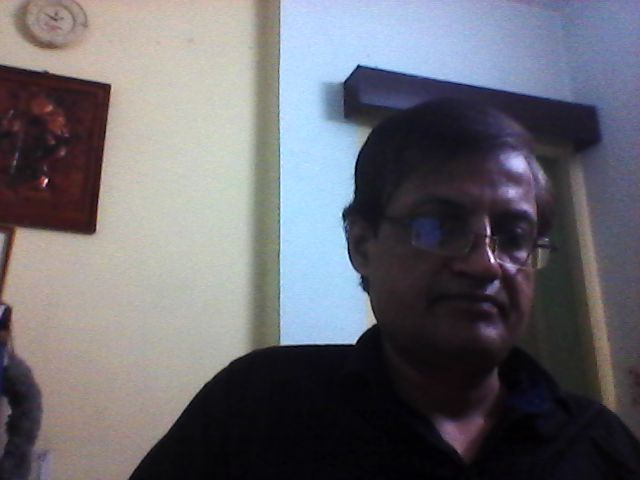

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  cap = cv2.VideoCapture(0)
  fourcc = cv2.VideoWriter_fourcc(*'XVID')
  out = cv2.VideoWriter('/content/output.mp4',fourcc, 20.0, (640,480))
  while (cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
      out.write(frame)
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Use OpenCV to read the save image. Use CascadeClassifier and specify the path of Haarcascade_frontalface_default.xml file. Convert the color image to Gray Scale Image. Use OpenCV to draw rectange around the face with line width 3. To draw the rectangle we need starting and ending co-ordinates. How to get Starting and Ending co-ordinates or the location of face in an image. Please check the detectMultiScale function in OpenCV. This take the gray image that you have converted from Original Image as first argument. Second argument is scale factor. Most improtant argument is "minNeighbors".

What is minNeighbors?
Haar Cascade Classifier uses **Sliding Window Approach**. The smallest window the cascade can detect is 20 by 20. It means cascade will pass a window throughout the image and then resize the window. Iterations continues and stopped when no need to resize the window is required. In each iteration it detects **True Positive** and **False Positive**. If you make minNeighbors=0 then number of false positive will increase and a large border will be found around the detected face. Please use minNeighbors=0 and verify the result. We need to give higher value to minNeighbors. Usually it is better to give value between 3~5. Too higher value will create the loss of True Positive.

detectMultiScale function returns starting point of the rectangle and width and height of the rectangle. Finally, we need to write date and time on the image. Use OpenCV and select Font as FONT_HERSHEY_SIMPLEX and use putText method to write text on image.

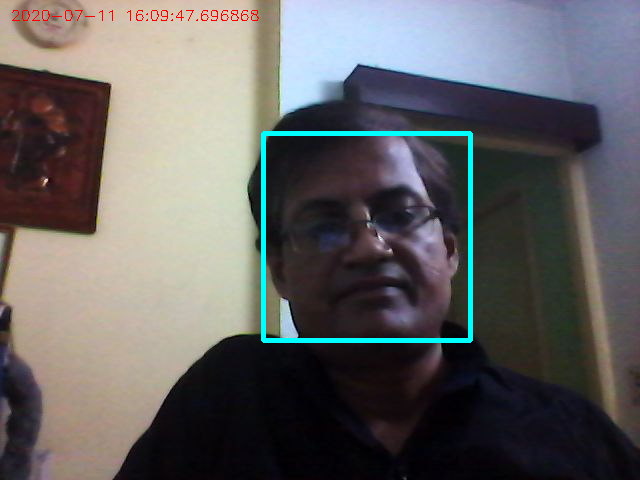

In [ ]:
img = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
face_cascade = cv2.CascadeClassifier("/content/sample_data/haarcascade_frontalface_default.xml")
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
my_face = face_cascade.detectMultiScale(gray_img,scaleFactor=1.05,minNeighbors=5)
for x,y,w,h in my_face:
  img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),3)
import datetime
font = cv2.FONT_HERSHEY_SIMPLEX 
img=cv2.putText(img,str(datetime.datetime.now()),(10,20),font,0.5,(0,0,255))
cv2_imshow(img)


API function is Retrived from https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=buJCl90WhNfq